# Classification: Decision Tree

## Data import

In [1]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [2]:
df

,timespreg,gluctol,diaspb,triceps,insulin,massindex,pedigree,age,target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


target
0    500
1    268
dtype: int64


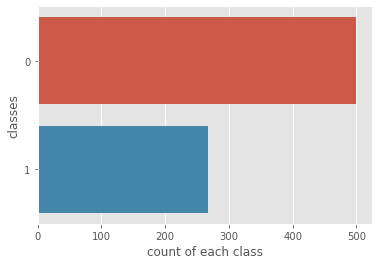

In [3]:
#Print class freq. through pandas 
print(df.groupby('target').size())

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=df.target ,data=df)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [4]:
#gives information about the data types,columns, null value counts, memory usage etc
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timespreg  768 non-null    int64  
 1   gluctol    768 non-null    int64  
 2   diaspb     768 non-null    int64  
 3   triceps    768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   massindex  768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   target     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Preparation

### Separate Train/Test sets


In [5]:
#Separate X and y (explanatory variables and target variable)
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

#X.head()
#y.head()

In [6]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=None, #preserve target proportions 
                                                    random_state= 123) #fix random seed for replicability

print(X_train.shape, X_test.shape)

(537, 8) (231, 8)


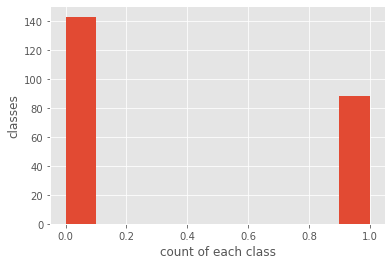

In [7]:
#Visualize Class Counts
plt.hist(y_test)
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

## The Decision Tree Model

![Tree](tree.png)

In [9]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2, min_samples_leaf=2)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 

In [10]:
y_pred

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [11]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[105  38]
 [ 32  56]]


In [12]:
#DEFINE YOUR CLASSIFIER and THE PARAMETERS GRID
from sklearn.tree import DecisionTreeClassifier
import numpy as np

classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [3,5,10, 50],
              'min_samples_split': [5,10],
              'min_samples_leaf': [2,4]}

In [13]:
#DEFINE YOUR GRIDSEARCH 
'''
GS perfoms an exhaustive search over specified parameter values for an estimator.
GS uses a Stratified K-Folds cross-validator
(The folds are made by preserving the percentage of samples for each class.)
If refit=True the model is retrained on the whole training set with the best found params
'''
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=10, n_jobs=-1)

In [19]:
#TRAIN YOUR CLASSIFIER
gs = gs.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV 3/3; 1/32] START criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5
[CV 3/3; 1/32] END criterion=entropy, max_depth=3, min_samples_leaf=2, min_samples_split=5;, score=0.589 total time=   0.0s
[CV 2/3; 8/32] START criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=10
[CV 2/3; 8/32] END criterion=entropy, max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.622 total time=   0.0s
[CV 2/3; 9/32] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5
[CV 2/3; 9/32] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=5;, score=0.431 total time=   0.0s
[CV 2/3; 10/32] START criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10
[CV 2/3; 10/32] END criterion=entropy, max_depth=10, min_samples_leaf=2, min_samples_split=10;, score=0.486 total time=   0.0s
[CV 3/3; 10/32] START criterion=entropy, max_depth=10, min_sa

In [21]:
#summarize the results of your GRIDSEARCH
print('***GRIDSEARCH RESULTS***')

print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
means = gs.cv_results_['mean_test_score']
stds = gs.cv_results_['std_test_score']
params = gs.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

***GRIDSEARCH RESULTS***
Best score: 0.569788 using {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.515539 (0.085715) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.521687 (0.077103) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.523457 (0.078679) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.523457 (0.078679) with: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 10}
0.553000 (0.020417) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.563739 (0.035587) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
0.569788 (0.036931) with: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5}
0.569788 (0.036931) with: {'criterion': 'entropy', 'max_dep

In [22]:
#TEST ON YOUR TEST SET 
best_model = gs.best_estimator_
y_pred = best_model.predict(X_test)

y_pred_train = best_model.predict(X_train)

In [23]:
#This is your prediction on the TEST SET
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0])

In [26]:
#EVALUATE YOUR PREDICTION (on the y_test that you left aside)
from sklearn import metrics

print('***RESULTS ON TRAIN SET***')
print("f1_score: ", metrics.f1_score(y_train, y_pred_train))
print("--")
print('***RESULTS ON TEST SET***')
print("f1_score: ", metrics.f1_score(y_test, y_pred))

***RESULTS ON TRAIN SET***
f1_score:  0.6906906906906907
--
***RESULTS ON TEST SET***
f1_score:  0.6463414634146342


In [27]:
#PRINT SOME FURTHER METRICS
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       143
           1       0.70      0.60      0.65        88

    accuracy                           0.75       231
   macro avg       0.74      0.72      0.73       231
weighted avg       0.74      0.75      0.74       231



In [28]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[120  23]
 [ 35  53]]


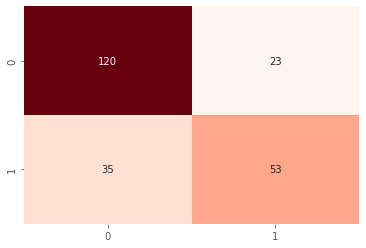

In [29]:
# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap="Reds", cbar=False);

#annot=True to annotate cells fmt: format


### ROC Curve

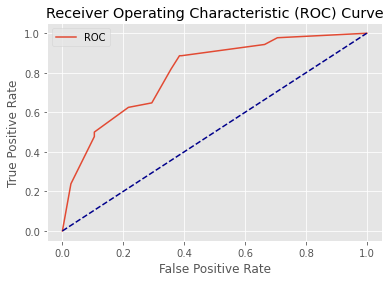

AUC: 0.80


In [31]:
from sklearn import metrics
model = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=4, min_samples_split=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr, tpr, thresholds=metrics.roc_curve(y_test,  y_probs[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.roc_auc_score(y_test, y_probs[:,1])
print('AUC: %.2f' % auc)

## Plotting the tree 

In [32]:
X_train.columns.tolist()

['timespreg',
 'gluctol',
 'diaspb',
 'triceps',
 'insulin',
 'massindex',
 'pedigree',
 'age']

In [33]:
from sklearn import tree
r = tree.export_text(model,feature_names=X_test.columns.tolist())
print(r)



|--- gluctol <= 123.50
|   |--- massindex <= 26.45
|   |   |--- pedigree <= 0.68
|   |   |   |--- class: 0
|   |   |--- pedigree >  0.68
|   |   |   |--- pedigree <= 0.78
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.78
|   |   |   |   |--- class: 0
|   |--- massindex >  26.45
|   |   |--- age <= 30.50
|   |   |   |--- pedigree <= 0.69
|   |   |   |   |--- class: 0
|   |   |   |--- pedigree >  0.69
|   |   |   |   |--- class: 0
|   |   |--- age >  30.50
|   |   |   |--- gluctol <= 94.50
|   |   |   |   |--- class: 0
|   |   |   |--- gluctol >  94.50
|   |   |   |   |--- class: 1
|--- gluctol >  123.50
|   |--- gluctol <= 166.50
|   |   |--- massindex <= 28.85
|   |   |   |--- age <= 26.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  26.50
|   |   |   |   |--- class: 0
|   |   |--- massindex >  28.85
|   |   |   |--- age <= 30.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  30.50
|   |   |   |   |--- class: 1
|   |--- gluctol >  166.50
|   |   |--- massi

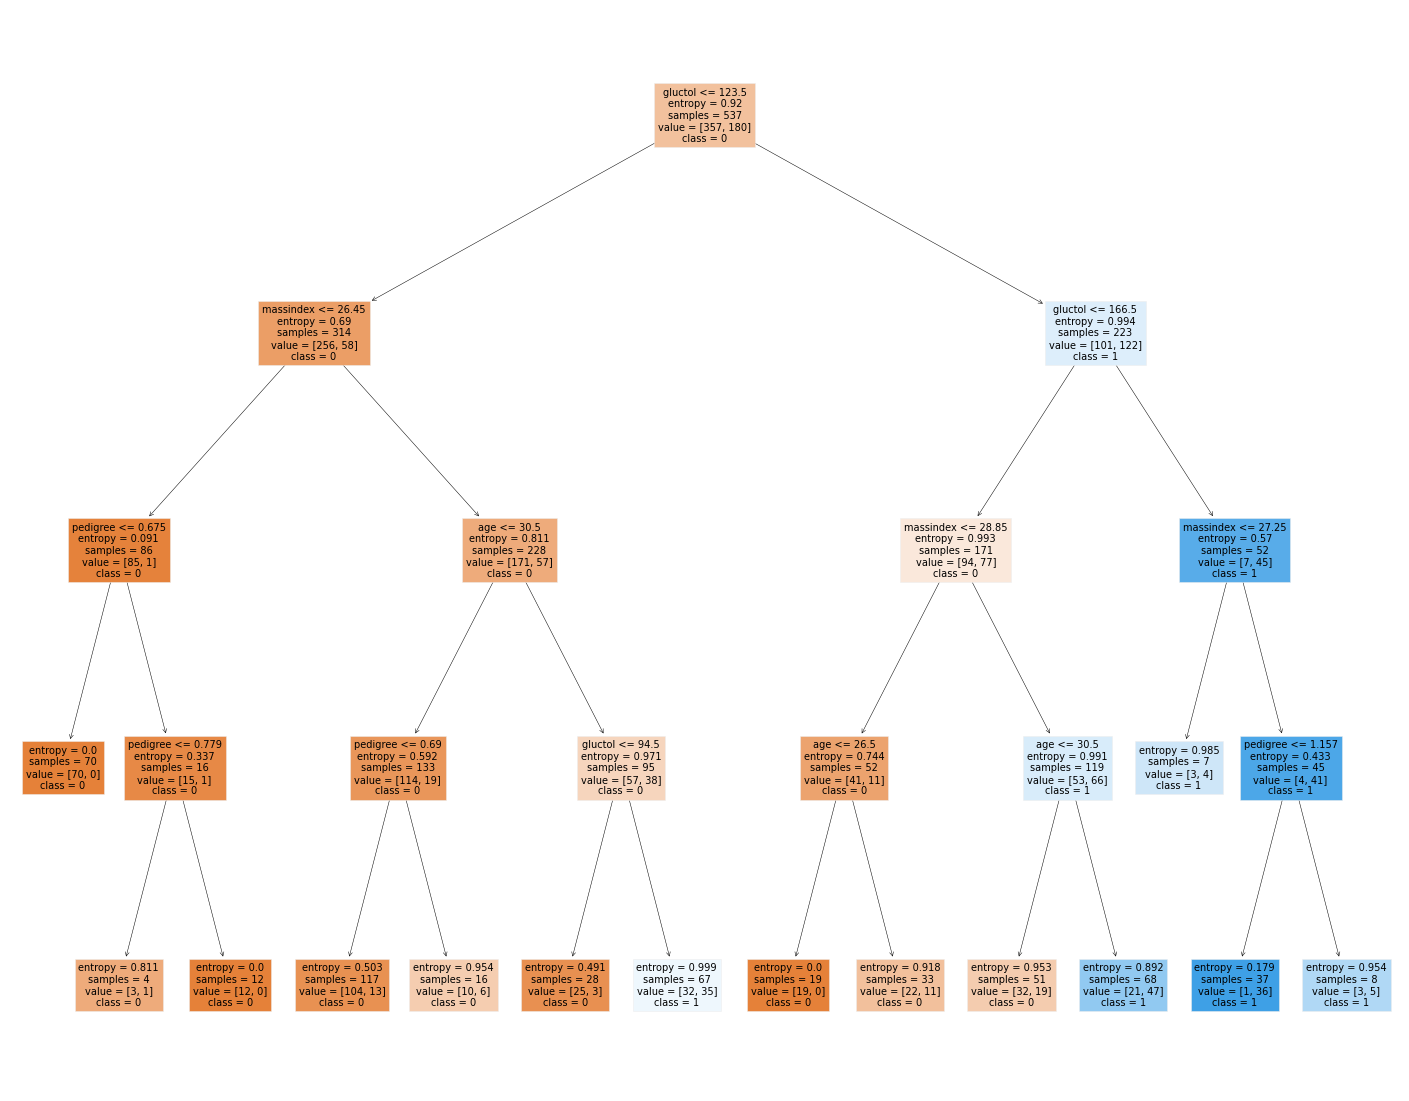

In [34]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X_test.columns.tolist(),  
                   class_names=['0','1'],
                   filled=True)


In [35]:
# We can export as a figure but we must install graphviz https://graphviz.gitlab.io/download/

# Install a conda package in the current Jupyter kernel
#import sys
#!conda install --yes --prefix {sys.prefix} graphviz
#!{sys.executable} -m pip install graphviz

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='decision_tree.dot', feature_names = X_test.columns.tolist(),class_names=['0','1'],
                   filled=True)

In [36]:
!dot -Tpng decision_tree.dot -o decision_tree.png -Gdpi=600

In [37]:
from IPython.display import Image
Image(filename = 'decision_tree.png')

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
/home/andrea/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


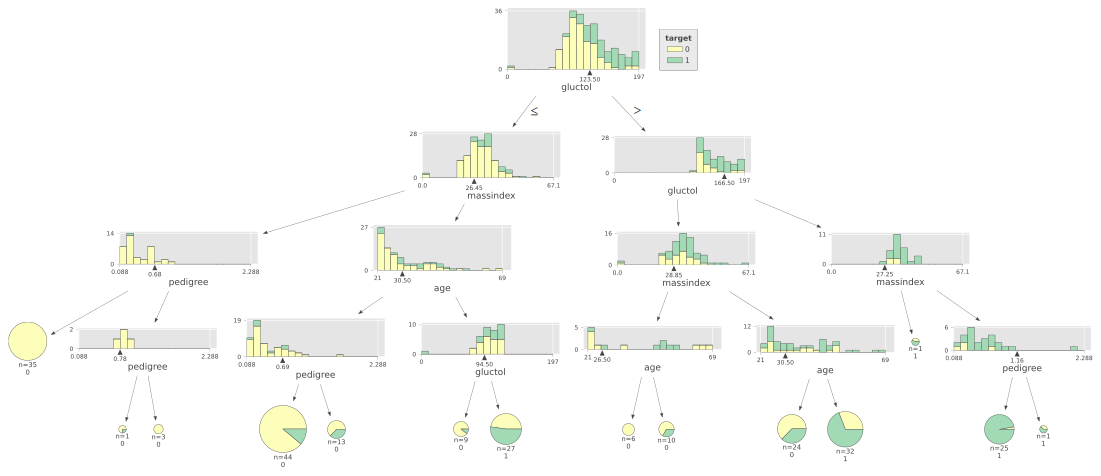

[CV 2/3; 24/32] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.490 total time=   0.0s
[CV 3/3; 24/32] START criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10
[CV 3/3; 24/32] END criterion=gini, max_depth=5, min_samples_leaf=4, min_samples_split=10;, score=0.533 total time=   0.0s
[CV 2/3; 26/32] START criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10
[CV 2/3; 26/32] END criterion=gini, max_depth=10, min_samples_leaf=2, min_samples_split=10;, score=0.473 total time=   0.0s
[CV 2/3; 27/32] START criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5
[CV 2/3; 27/32] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=5;, score=0.477 total time=   0.0s
[CV 3/3; 28/32] START criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10
[CV 3/3; 28/32] END criterion=gini, max_depth=10, min_samples_leaf=4, min_samples_split=10;, score=0.422 total time=   0.0s
[CV 3/3; 29/3

In [38]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(model, X_test, y_test,
                target_name="target",
                feature_names=X_test.columns.tolist(),  
                class_names=['0','1'],)

viz
